# Lab 2 : Avocado Sales

In [96]:
import pandas as pd
avocados = pd.read_csv(r"C:\Users\achur\OneDrive\Desktop\School\CP Fall 2024\544\GSB-544-2\avocado-updated-2020.csv")
avocados.head()

,date,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.0,organic,2015,Albany
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,conventional,2015,Atlanta
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.0,organic,2015,Atlanta
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.0,conventional,2015,Baltimore/Washington


### 1. Breifly describe the data set. What information does it contain? 
This dataset contains information about Avacados from the HAAS Avacado Board from the years 2015 to 2020. The dataset features the date of purchase (month, day, and year), the average price, the total volume, the size of avocado(small:4046, large:4225, extra large:4770), the total number of bags (small bags, large bags, and extra large bags), the type of avocado (organic and conventional), the year, and the geography(the region where it was purchased). The data set allows the viewer to understand the trend of avocado sales and their vairables through the years of 2015-2020. 


### 2. Clean the data in any way you see fit. 

In [97]:
# find how many unique variables are in geography
print(avocados["geography"].unique())

['Albany' 'Atlanta' 'Baltimore/Washington' 'Boise' 'Boston' 'Buffalo/Rochester'
 'California' 'Charlotte' 'Chicago' 'Cincinnati/Dayton' 'Columbus'
 'Dallas/Ft. Worth' 'Denver' 'Detroit' 'Grand Rapids' 'Great Lakes'
 'Harrisburg/Scranton' 'Hartford/Springfield' 'Houston' 'Indianapolis'
 'Jacksonville' 'Las Vegas' 'Los Angeles' 'Louisville' 'Miami/Ft. Lauderdale'
 'Midsouth' 'Nashville' 'New Orleans/Mobile' 'New York' 'Northeast'
 'Northern New England' 'Orlando' 'Philadelphia' 'Phoenix/Tucson' 'Pittsburgh'
 'Plains' 'Portland' 'Raleigh/Greensboro' 'Richmond/Norfolk' 'Roanoke'
 'Sacramento' 'San Diego' 'San Francisco' 'Seattle' 'South Carolina'
 'South Central' 'Southeast' 'Spokane' 'St. Louis' 'Syracuse' 'Tampa'
 'Total U.S.' 'West' 'West Tex/New Mexico']
['Albany' 'Atlanta' 'Baltimore/Washington' 'Boise' 'Boston' 'Buffalo/Rochester'
 'California' 'Charlotte' 'Chicago' 'Cincinnati/Dayton' 'Columbus'
 'Dallas/Ft. Worth' 'Denver' 'Detroit' 'Grand Rapids' 'Great Lakes'
 'Harrisburg/Scranto

In [98]:
# clean data
# rename sizes for avocados
avocados = avocados.rename(columns = {"4046":"small", "4225":"large", "4770":"extralarge"})
# data set with major regions
major_regions = {
    "West": "West", 
    "Great Lakes": "Great Lakes",
    "Midsouth": "Midsouth", 
    "Northeast": "Northeast", 
    "South Central": "South Central", 
    "Southeast": "Southeast", 
    "West Tex/New Mexico": "West Tex/New Mexico", 
    "Plains": "Plains", 
    "Northern New England": "Northern New England",
    "California": "California",
    "New York": "New York", 
    # "Total U.S.": "Total U.S."
    }
# data set with minor regions
minor_regions = { 
    "South Carolina": "South Carolina",  
    "Albany": "Albany",
    "Atlanta": "Atlanta", 
    'Baltimore/Washington': 'Baltimore/Washington', 
    'Boise': 'Boise', 
    'Boston': 'Boston', 
    'Buffalo/Rochester': 'Buffalo/Rochester', 
    'Charlotte': 'Charlotte', 
    'Chicago': 'Chicago', 
    'Cincinnati/Dayton': 'Cincinnati/Dayton', 
    'Columbus': 'Columbus', 
    'Dallas/Ft. Worth': 'Dallas/Ft. Worth',  
    'Denver': 'Denver', 
    'Detroit': 'Detroit', 
    'Grand Rapids': 'Grand Rapids', 
    'Harrisburg/Scranton': 'Harrisburg/Scranton', 
    'Hartford/Springfield': 'Hartford/Springfield', 
    'Houston': 'Houston', 
    'Indianapolis': 'Indianapolis', 
    'Jacksonville': 'Jacksonville', 
    'Las Vegas': 'Las Vegas', 
    'Los Angeles': 'Los Angeles', 
    'Louisville': 'Louisville', 
    'Miami/Ft. Lauderdale': 'Miami/Ft. Lauderdale', 
    'Nashville': 'Nashville', 
    'New Orleans/Mobile': 'New Orleans/Mobile', 
    'Orlando': 'Orlando', 
    'Philadelphia': 'Philadelphia',
    'Phoenix/Tucson': 'Phoenix/Tucson', 
    'Pittsburgh': 'Pittsburgh', 
    'Portland': 'Portland', 
    'Raleigh/Greensboro': 'Raleigh/Greensboro', 
    'Richmond/Norfolk': 'Richmond/Norfolk', 
    'Roanoke': 'Roanoke', 
    'Sacramento': 'Sacramento',
    'San Diego': 'San Diego', 
    'San Francisco': 'San Francisco', 
    'Seattle': 'Seattle', 
    'Spokane': 'Spokane', 
    'St. Louis': 'St. Louis', 
    'Syracuse': 'Syracuse', 
    'Tampa': 'Tampa'
    }
avocados["major_regions"] = avocados["geography"].map(major_regions)
avocados["minor_regions"] = avocados["geography"].map(minor_regions)
avocados.head()

# Resource used to understand how mapping effects variables: https://www.geeksforgeeks.org/python-map-function/

,date,average_price,total_volume,small,large,extralarge,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography,major_regions,minor_regions
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany,NaN,Albany
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.0,organic,2015,Albany,NaN,Albany
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,conventional,2015,Atlanta,NaN,Atlanta
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.0,organic,2015,Atlanta,NaN,Atlanta
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.0,conventional,2015,Baltimore/Washington,NaN,Baltimore/Washington


### 3. Which major geographical region sold the most total organic, small Hass avocados in 2017?

In [99]:
# major region with most organic, small Hass avocados in 2017
avocados2017 = avocados[(avocados["year"] == 2017) & (avocados["type"] == "organic")]
major_region_sales = avocados2017.groupby("major_regions")["small"].sum()
top_major_region = major_region_sales.idxmax()
most_sales = major_region_sales.max()
print(f"{top_major_region} {most_sales}")

# Resource used to utilize idxmax() function: https://www.statology.org/idxmax-pandas/#:~:text=You%20can%20use%20the%20pandas.DataFrame.idxmax()%20function%20to%20return%20the%20index

West 1870206.29
West 1870206.29


The West is the major geographical region that sold the most total organic, small Hass avocados in 2017. 

### 4. Split the date variable into month, day, and year variables. In which month is the highest average volume of avocado sales?

In [100]:
avocados["date"] = pd.to_datetime(avocados["date"])
avocados["day"] = avocados["date"].dt.day
avocados["month"] = avocados["date"].dt.month
avocados["year"] = avocados["date"].dt.year
avocados.head()
highest_month = avocados.groupby("month")["total_volume"].mean()
highestmonth = highest_month.idxmax()
print(highestmonth)

5
5


The month with the highest average volume of avocado sales is May. 

### 5. Which metro area geographical regions sold the most total avocados? Plot side-by-side box-plots of the total volume for only the five metro geographical regions with the highest averages for total_volume variable.

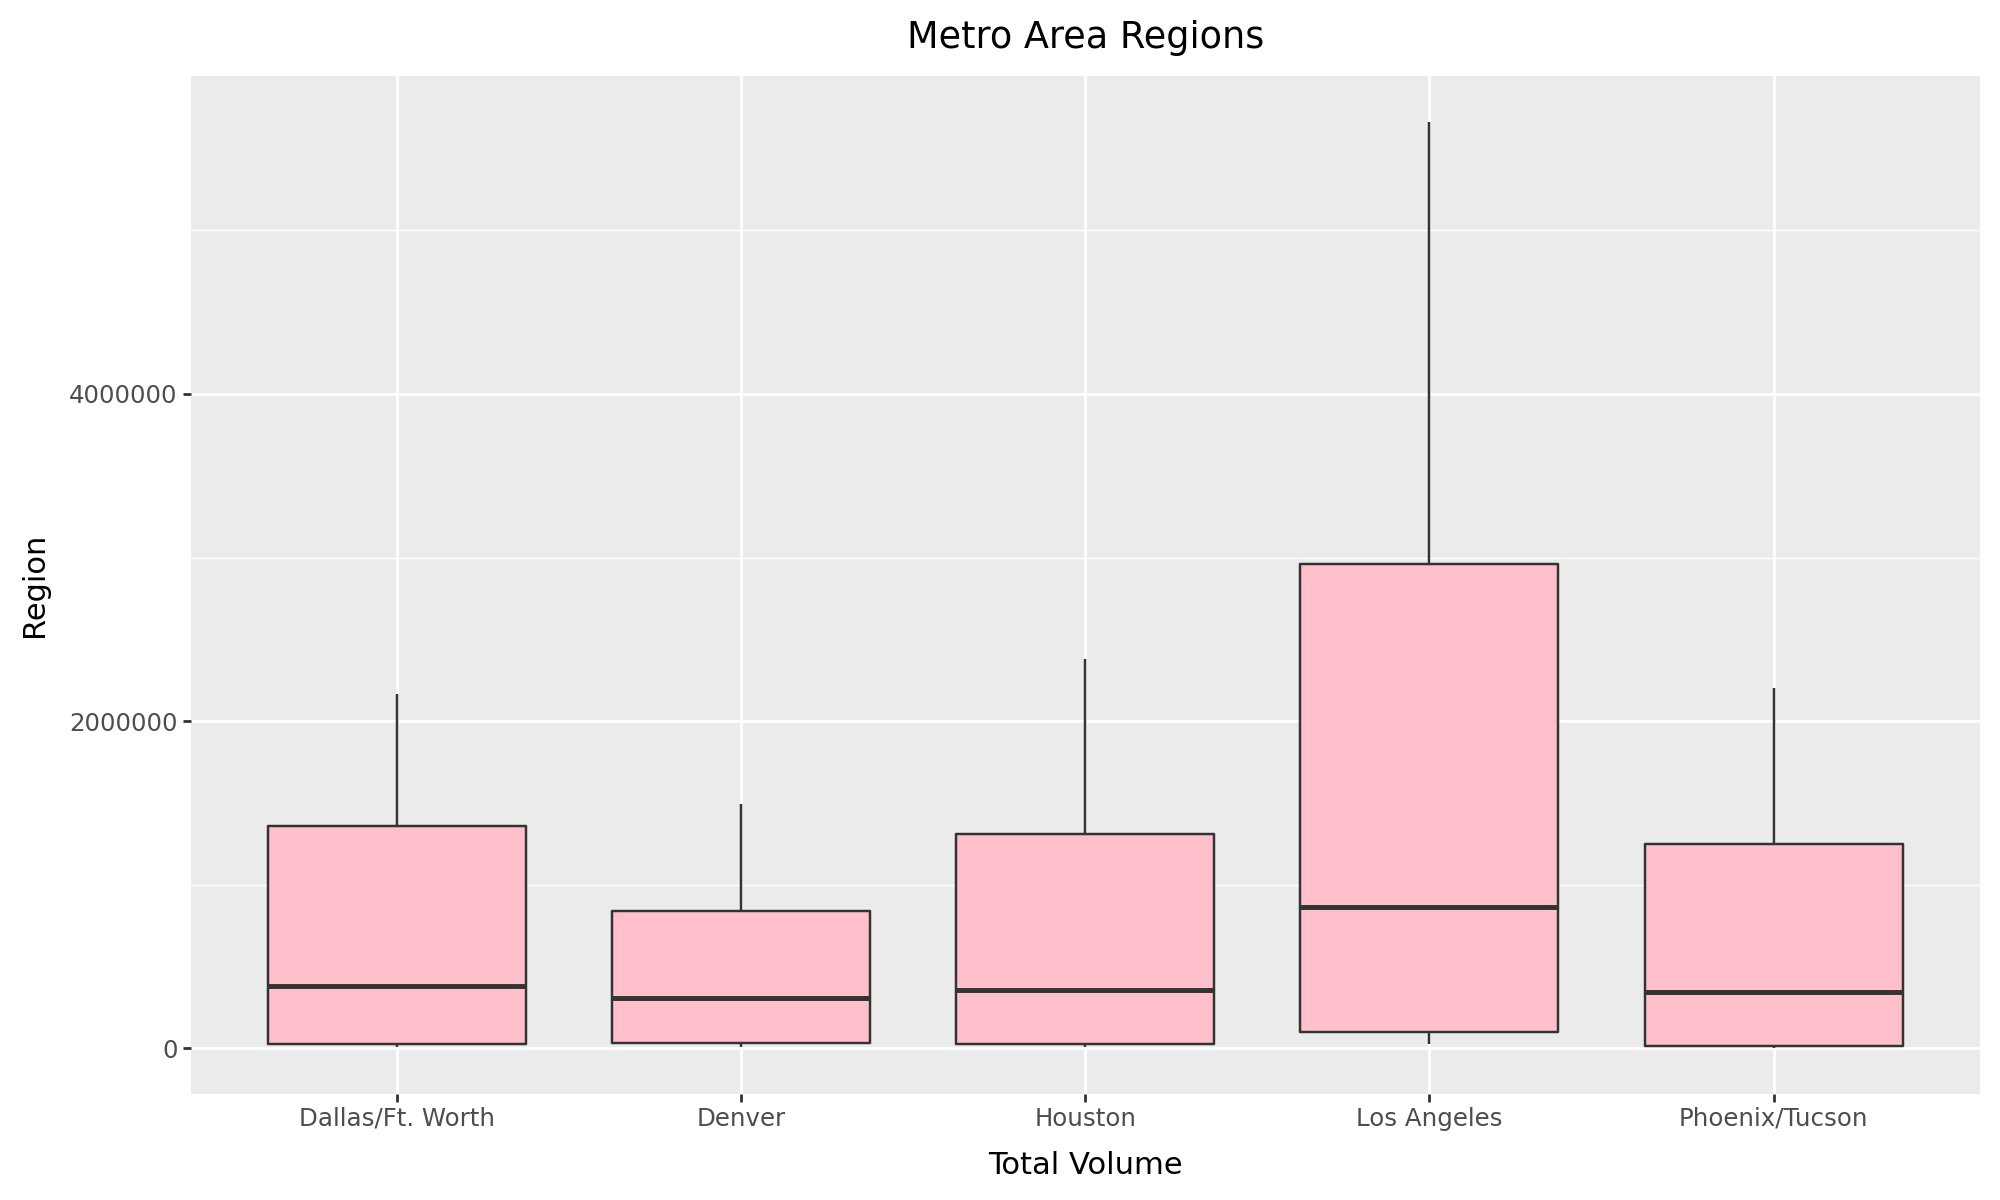

In [101]:
from plotnine import *

metro = (
    avocados.groupby("minor_regions")
    .agg(mean_vol = ("total_volume", "mean"))
    .nlargest(5, "mean_vol")
    .reset_index()
)
avocados_metro = avocados[avocados["minor_regions"].isin(metro["minor_regions"])]
(ggplot(
    avocados_metro, aes(x = "minor_regions", y = "total_volume"))
    + geom_boxplot(fill = "pink")
    + labs(x = "Total Volume", y = "Region", title = "Metro Area Regions")
    + theme(figure_size = (10, 6))
)

Los Angeles sold the most total avocados. 

### 6. From your cleaned data set, create a data set with only these California regions (San Francisco, Sacramento, Los Angeles, San Diego) and answer the following questions about these California regions only. 

In [216]:
california = ["San Francisco", "Sacramento", "Los Angeles", "San Diego"]
avocados_california = avocados[(avocados["geography"].isin(california))]


### 7. In which California regions is the price of organic versus conventional avocados most different? Support your answer with a few summary statistics AND a visualization.

In [217]:
# pivot table
california = ["San Francisco", "Sacramento", "Los Angeles", "San Diego"]
avocados_california = avocados[(avocados["geography"].isin(california))]
pivot_avocados_california = avocados_california.pivot_table(
    index = [ "geography", "date"],
    columns = "type", 
    values = "average_price").reset_index()
pivot_avocados_california["price difference of O and C"] = (
    pivot_avocados_california["organic"] - pivot_avocados_california["conventional"])
pivot_avocados_california.groupby("geography")["price difference of O and C"].describe()

# Resource used for .describe(): https://www.geeksforgeeks.org/how-to-calculate-summary-statistics-in-pandas/

,count,mean,std,min,25%,50%,75%,max
geography,,,,,,,,
Los Angeles,306.0,0.527778,0.188143,0.07,0.40,0.53,0.6700,1.21
Sacramento,306.0,0.578497,0.270029,-0.09,0.36,0.54,0.7775,1.43
San Diego,306.0,0.684510,0.211286,0.20,0.52,0.67,0.8300,1.41
San Francisco,306.0,0.718954,0.333801,0.02,0.46,0.71,0.9475,1.59


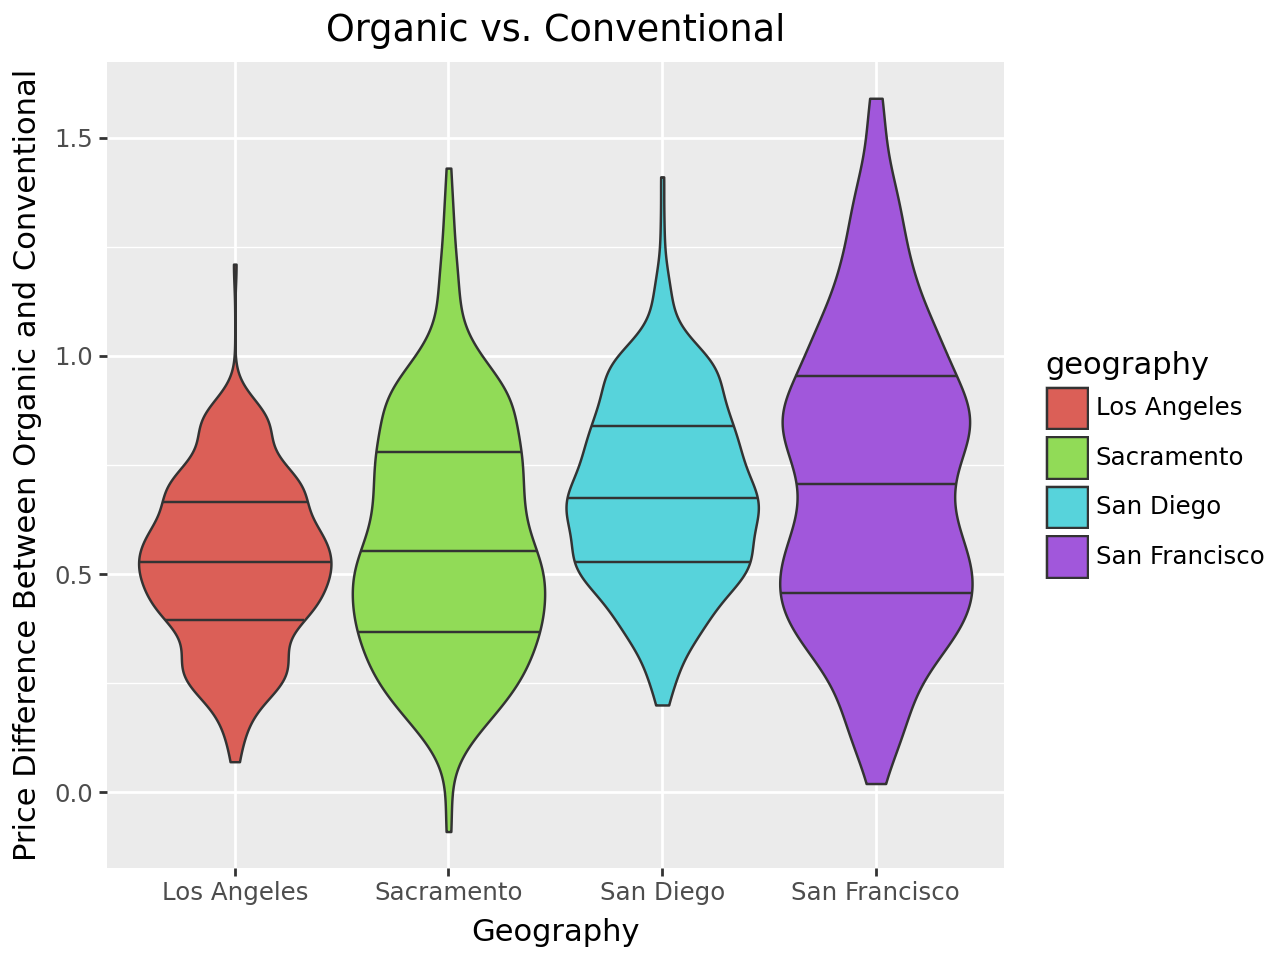

In [218]:
# visualization

#melt pivot table
pivot_avocados_california = pd.melt(
    pivot_avocados_california, 
    id_vars = ["geography", "date", "price difference of O and C"],
    value_vars = ["organic", "conventional"], 
    var_name = "type",
    value_name = "average_price"
)

pivot_avocados_california["type"] = pd.Categorical(pivot_avocados_california["type"])
(ggplot(pivot_avocados_california, aes(
    x = "geography", y = "price difference of O and C", fill = "geography"
))
+ geom_violin(draw_quantiles = [0.25, 0.50, 0.75], scale = "width", trim = True)
+ labs(x = "Geography", y = "Price Difference Between Organic and Conventional", title = "Organic vs. Conventional")
)

The California region that has the most difference of price between organic and conventional is San Francisco. The max difference is the highest for San Francisco than the other regions at 1.59. The violin for San Francisco has the widest and longest of the regions. 

### 8. The following plot shows, for all four California regions, the proportion of the average Hass avocado sales that are small, large, or extra large; conventional vs. organic. Recreate the plot; you do not have to replicate the exact finishing touches - e.g., color, theme - but your plot should resemble the content of this plot.

<positron-console-cell-219>:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


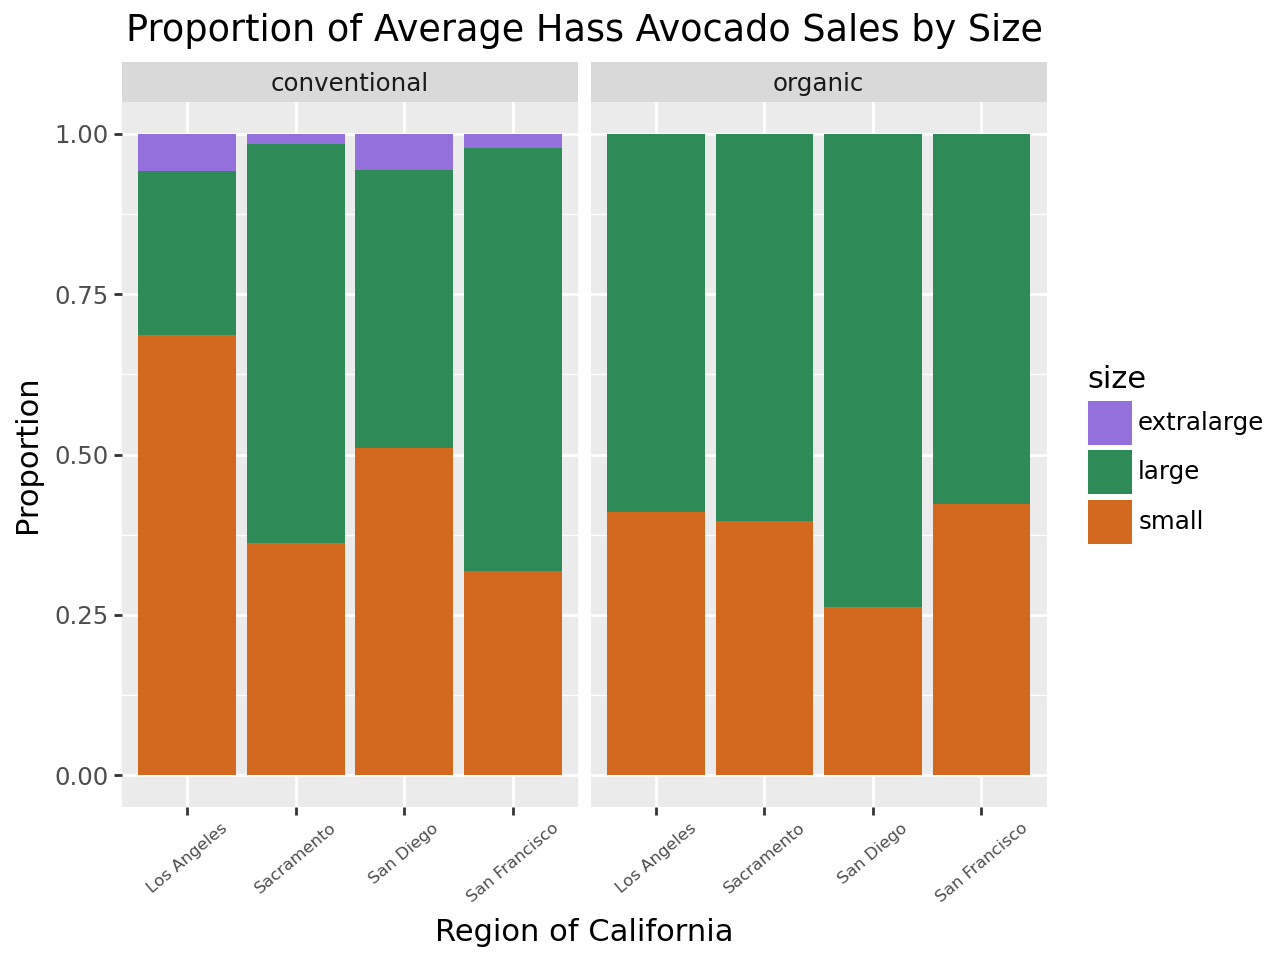

In [219]:
# only include variables from data set listed in bar chart
# include type, size, average sales, and geography
filtered_variables = avocados.loc[avocados["geography"].isin(california),
                                    ["geography", "type", "small", "large", "extralarge", "total_volume", "year"]]
new_ca = filtered_variables.melt(id_vars = ["geography", "type", "total_volume", "year"], 
                                    value_vars = ["small", "large", "extralarge"],
                                    var_name = "size", 
                                    value_name = "sales")
new_ca["size"] = pd.Categorical(new_ca["size"], categories=["extralarge", "large", "small"], ordered = True)
average_sales = (new_ca.groupby(["type", "geography", "size", "year"], as_index = False).agg(average_sales = ("sales", "mean")))

(ggplot(average_sales, aes(x = "geography", y = "average_sales", fill = "size"))
    + geom_bar(stat = "identity", position = "fill")
    + labs(x = "Region of California", y = "Proportion", title = "Proportion of Average Hass Avocado Sales by Size")
    + scale_fill_manual(values = ["mediumpurple", "seagreen", "chocolate"])
    + facet_wrap("~type")
    + theme(axis_text_x = element_text(size = 6, angle = 40))
)

# https://matplotlib.org/stable/gallery/color/named_colors.html

### 9. Using outside data

In [238]:
house_price = pd.read_csv(r"C:\Users\achur\OneDrive\Desktop\School\CP Fall 2024\544\HousePrices.csv")

house_avocado = new_ca.merge(house_price, on =["geography", "year"], how = "left").reset_index()
house_avocado["house_price"].fillna(house_avocado["house_price"].mean(), inplace=True)
house_avocado = house_avocado.groupby(["geography"])[["total_volume", "house_price"]].mean().reset_index()
avocado_long = pd.melt(house_avocado, id_vars = "geography", value_vars = ["total_volume", "house_price"], var_name = "Variable", value_name = "Value")
print(avocado_long)

<positron-console-cell-238>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.




       geography      Variable         Value
0    Los Angeles  total_volume  1.567566e+06
1     Sacramento  total_volume  2.439074e+05
2      San Diego  total_volume  2.839288e+05
3  San Francisco  total_volume  4.480668e+05
4    Los Angeles   house_price  5.421960e+05
5     Sacramento   house_price  2.832968e+05
6      San Diego   house_price  4.127464e+05
7  San Francisco   house_price  4.127464e+05
       geography      Variable         Value
0    Los Angeles  total_volume  1.567566e+06
1     Sacramento  total_volume  2.439074e+05
2      San Diego  total_volume  2.839288e+05
3  San Francisco  total_volume  4.480668e+05
4    Los Angeles   house_price  5.421960e+05
5     Sacramento   house_price  2.832968e+05
6      San Diego   house_price  4.127464e+05
7  San Francisco   house_price  4.127464e+05


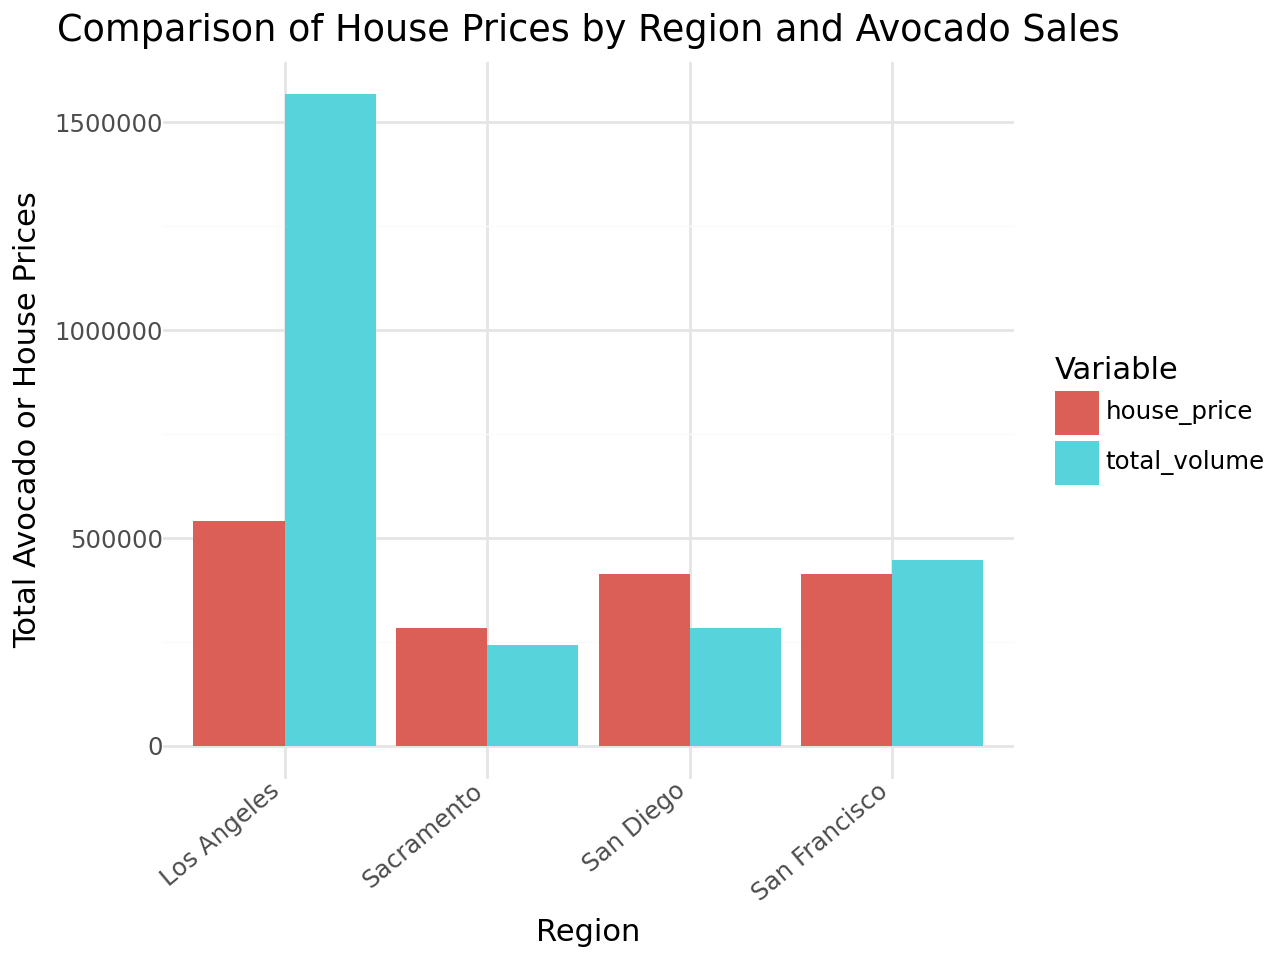

In [239]:
(ggplot(avocado_long, aes(x = "geography", y = "Value", fill = "Variable"))
    + geom_bar(stat = "identity", position = "dodge")
    + labs(x = "Region", y = "Total Avocado or House Prices", title = "Comparison of House Prices by Region and Avocado Sales")
    + theme_minimal()
    + theme(axis_text_x = element_text(angle = 40, hjust = 1))
)

### Appendix and References
https://www.kaggle.com/datasets/timmate/avocado-prices-2020?resource=download&select=avocado-updated-2020.csv

https://www.geeksforgeeks.org/python-map-function/

https://www.statology.org/idxmax-pandas/#:~:text=You%20can%20use%20the%20pandas.DataFrame.idxmax()%20function%20to%20return%20the%20index

https://matplotlib.org/stable/gallery/color/named_colors.html

https://sf.curbed.com/2018/4/5/17201888/san-francisco-median-home-house-price-average-2018#:~:text=2016%3A%20%241.31%20million%2C,up%2019%20percent

https://www.businessinsider.com/san-francisco-median-house-home-price-2018-7

https://sfist.com/2019/08/02/sfs-median-home-prices-have-quadrupled-since-the-1990s/

https://www.laalmanac.com/economy/ec37.php#:~:text=Home%20|%20All%20Almanac%20Topics%20|%20Economy%20&%20Business.%20Median

https://fred.stlouisfed.org/series/ATNHPIUS40900Q#:~:text=Graph%20and%20download%20economic%20data%20for%20All-Transactions%20House%20Price%20Index

Generative A.I. Statement: Chat-GPT was used to suggest changes in code to debug errors. An example of errors include, incorrect syntax, incorrect usage of parameters for plots, making suggestions to fix parameters to resolve the error in code, and also understanding how to use .idxmx(), .agg(), and the hjust functions. Chat-GPT was only used to resolve errors in already hand written code. 


